### Importin libraries

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### data Preprocessing

#### Training image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


#### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 43.    35.    44.  ]
   [ 84.    74.    85.  ]
   [ 80.5   70.5   81.5 ]
   ...
   [126.   118.   131.  ]
   [123.75 115.75 128.75]
   [112.75 104.75 117.75]]

  [[ 43.    34.25  44.  ]
   [ 79.    69.    80.  ]
   [ 82.    72.    83.  ]
   ...
   [112.5  104.5  117.5 ]
   [113.25 105.25 118.25]
   [116.25 108.25 121.25]]

  [[ 42.25  33.75  43.25]
   [ 80.25  70.25  81.25]
   [ 85.5   75.5   86.5 ]
   ...
   [115.25 107.25 120.25]
   [118.   110.   123.  ]
   [106.    98.   111.  ]]

  ...

  [[ 65.75  58.75  68.75]
   [ 83.75  75.75  86.75]
   [ 91.5   83.5   94.5 ]
   ...
   [146.25 140.25 152.25]
   [145.   139.   151.  ]
   [152.5  146.5  158.5 ]]

  [[ 51.    45.    54.  ]
   [112.   104.   115.  ]
   [106.25  98.25 109.25]
   ...
   [160.25 154.25 166.25]
   [156.   150.   162.  ]
   [158.25 152.25 164.25]]

  [[ 48.25  41.75  51.25]
   [ 89.    81.    92.  ]
   [ 96.5   88.5   99.5 ]
   ...
   [157.25 151.25 163.25]
   [145.75 139.75 151.75]
   [155.75 149.75 16

### To avoid overfitting
1. Choose small learning rate default is 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase number of neurons
3. Add more Convolution layer to extract more features from images there may be possibilty that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature

### Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

#### Building Convolution Layer
#####  -------------> https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters = 128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # to avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [21]:
training_history = model.fit(x= training_set,validation_data= validation_set,epochs= 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1195s 544ms/step - accuracy: 0.9089 - loss: 0.2845 - val_accuracy: 0.9266 - val_loss: 0.2233
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1141s 519ms/step - accuracy: 0.9364 - loss: 0.1933 - val_accuracy: 0.9354 - val_loss: 0.1946
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1148s 523ms/step - accuracy: 0.9526 - loss: 0.1456 - val_accuracy: 0.9467 - val_loss: 0.1681
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1190s 541ms/step - accuracy: 0.9640 - loss: 0.1110 - val_accuracy: 0.9562 - val_loss: 0.1374
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1173s 534ms/step - accuracy: 0.9688 - loss: 0.0958 - val_accuracy: 0.9624 - val_loss: 0.1202
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1196s 544ms/step - accuracy: 0.9752 - loss: 0.0771 - val_accuracy: 0.9652 - val_loss: 0.1082
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1165s 530ms/step - accuracy: 0.9786 - loss: 0.0654 - val_accuracy: 0.9548 - val_loss: 0.1496
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1169s 532ms/s

### Model evaluation

In [23]:
# model evolution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 260s 118ms/step - accuracy: 0.9963 - loss: 0.0128


In [24]:
print(train_loss,train_acc)

0.011748374439775944 0.9965858459472656


In [25]:
# Model evolution in validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 66s 120ms/step - accuracy: 0.9774 - loss: 0.0781


In [26]:
print(val_loss,val_acc)

0.0808279737830162 0.9761552214622498


### Saving Model

In [28]:
model.save("trained_model.h5")  # file has large size


In [29]:
model.save("trained_model.keras") # file has small size

In [30]:
training_history.history

{'accuracy': [0.9156270027160645,
  0.9405505657196045,
  0.9554164409637451,
  0.9659008383750916,
  0.9707375764846802,
  0.9768262505531311,
  0.9797993898391724,
  0.9820470809936523,
  0.9847642183303833,
  0.9849206805229187],
 'loss': [0.2641483247280121,
  0.18269242346286774,
  0.13606670498847961,
  0.10479288548231125,
  0.08990557491779327,
  0.07246647775173187,
  0.062049172818660736,
  0.05525464937090874,
  0.049037255346775055,
  0.04726045951247215],
 'val_accuracy': [0.9266446828842163,
  0.9354085922241211,
  0.9466765522956848,
  0.9561802744865417,
  0.9623833298683167,
  0.9651718735694885,
  0.954757571220398,
  0.9624971747398376,
  0.9695538282394409,
  0.9761552214622498],
 'val_loss': [0.22330471873283386,
  0.1945633590221405,
  0.16808901727199554,
  0.13742440938949585,
  0.12022800743579865,
  0.1082153394818306,
  0.14955483376979828,
  0.128785640001297,
  0.11350804567337036,
  0.08082795888185501]}

In [31]:
# Recording History in JSON

import json
with open('history.json', 'w') as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

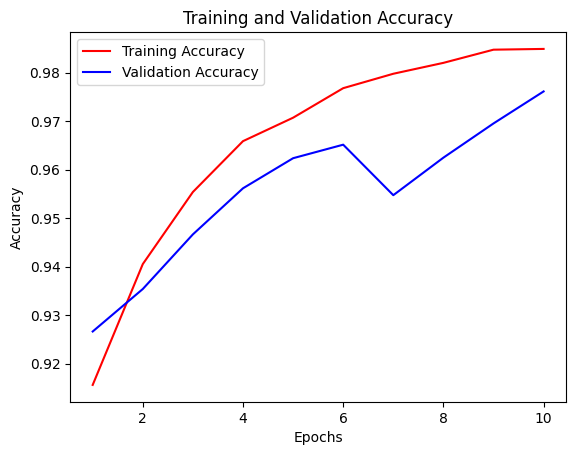

In [39]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'],color = 'red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()